In [19]:
import pandas as pd
import numpy as np
import re
import glob

import pyabf

In [20]:
lihua_file_path = '/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Lihua/'

meta_path = lihua_file_path + 'L5-Resonance-Intrinsic-Lihua-April 18-2020.xlsx'

abf_sheet = pd.read_excel(meta_path)

lihua_file_path = '/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Lihua/'

meta_path = lihua_file_path + 'L23-Resonance-Intrinsic-Lihua-April 18-2020 - Copy.xlsx'
abf_sheet_l23 = pd.read_excel(meta_path)

abf_sheet = abf_sheet.append(abf_sheet_l23, ignore_index=True)

In [3]:
lihua_file_path = '/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/**/*.xlsx'
homeira_excel_files = glob.glob(lihua_file_path, recursive= False)
print(homeira_excel_files)

['/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/L3/L3-Resonance-Intrinsic-Homeira-April 16-2020.xlsx', '/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/L5/L5-Resonance-Intrinsic-Homeira-April 16-2020.xlsx', '/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/L23/L23-Resonance-Intrinsic-Homeira-April 16-2020.xlsx']


In [4]:
for excel_file_name in homeira_excel_files:
    excel_sheet = pd.read_excel(excel_file_name)
    abf_sheet = abf_sheet.append(excel_sheet, ignore_index=True) 
len(abf_sheet)

/Users/stripathy/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


217

In [5]:
abf_sheet.iloc[150]

File name -Intrinsic                19328000
File name -Intrinsic .1                  NaN
File name -Intrinsic .2                  NaN
File name -Intrinsic .3                  NaN
Holding -80 mV                             0
Holding -80 mV-ZD                        NaN
Holding -80-ZD                           NaN
Holding -80-ZD.1                         NaN
Holding RMP                                1
Holding RMP-ZD                           NaN
Holding-80                                 0
Holding-80-ZD                            NaN
Holding-80.1                             NaN
Holding-80.2                             NaN
Holding-RMP                                1
Holding-RMP-ZD                           NaN
Holding-RMP-ZD.1                         NaN
Holding-RMP-ZD.2                         NaN
Holding-RMP.1                            NaN
Tag                             Regular aCSF
ZAP-Subthreshold                         NaN
ZAP-Subthreshold.1                       NaN
ZAP-Suprat

In [6]:
new_path = '/Users/stripathy/Downloads/Analayzed/'
curr_zap_abf_files = glob.glob(new_path + '**/*.abf', recursive= True)

new_path = '/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/'
other_zap_abf_files = glob.glob(new_path + '**/*.abf', recursive= True)
print(len(other_zap_abf_files))
curr_zap_abf_files = curr_zap_abf_files + other_zap_abf_files

1387


In [7]:
len(curr_zap_abf_files)

1878

In [8]:
import os
abf_file_names = [os.path.basename(s) for s in curr_zap_abf_files]

In [9]:
abf_sheet_df = pd.DataFrame({'abf_name' : abf_file_names, 'abf_path' : curr_zap_abf_files})

In [10]:
abf_sheet_df = abf_sheet_df.drop_duplicates(subset='abf_name', keep="first")
len(abf_sheet_df)
#abf_sheet_df['cell_id'] = ''

1779

In [11]:
re_result = [s for s in re.split(' |-|-|to', '2019_11_28_0007-2019_11_28_0009')]
first_num = re_result[0]
second_num = re_result[-1]
print(first_num)
print(second_num)

2019_11_28_0007
2019_11_28_0009


In [12]:
for ind, cell in enumerate(abf_sheet['ZAP-subthreshold']):
    if cell != 0 and cell is not np.nan:
        
        #print(type(cell))
        #print([int(s) for s in re.split(' |-|to', cell) if s.isdigit()])
        #(first_num, second_num) = re.findall('\d+?\w\d+', cell)
        if(type(cell) == str):
            re_result = re.split(' |-|-|to', cell)
            first_num = re_result[0]
            second_num = re_result[-1]
        else:
            first_num = str(cell)
#         if int(second_num) - int(first_num) > 20:
#             print('typo in files')
#             continue
        
        abf_list = [str(first_num) +'.abf']
        #abf_list = [str(s) +'.abf' for s in range(int(first_num), int(second_num)+1)]
        intrinsic_file = str(abf_sheet['File name -Intrinsic '][ind]) + '.abf'
        for abf_file in abf_list:
            #print(abf_file)
            my_search = abf_sheet_df.loc[abf_sheet_df['abf_name'] == abf_file].index
            if len(my_search) > 0:
                index = my_search[0]
                abf_sheet_df.at[index, 'cell_id'] = intrinsic_file
                abf_sheet_df.at[index, 'file_type'] = 'zap_subthreshold_rmp'
                #print('intrinsic file is ' + abf_sheet_df.at[int(index), 'cell_id'])
            else:
                print(cell)
                print('abf file ' + abf_file + ' not found in hard drive')
                continue
                
for ind, cell in enumerate(abf_sheet['ZAP-subthreshold.1']):
    if cell != 0 and cell is not np.nan:
        #print(cell)
        #print([int(s) for s in re.split(' |-|to', cell) if s.isdigit()])
        if(type(cell) == str):
            re_result = re.split(' |-|-|to', cell)
            first_num = re_result[0]
            second_num = re_result[-1]
        else:
            first_num = str(cell)
        
        
#         if int(second_num) - int(first_num) > 20:
#             print('typo in files')
#             continue
        
        abf_list = [str(first_num) +'.abf']
        #abf_list = [str(s) +'.abf' for s in range(int(first_num), int(second_num)+1)]
        intrinsic_file = str(abf_sheet['File name -Intrinsic '][ind]) + '.abf'
        for abf_file in abf_list:
            #print(abf_file)
            my_search = abf_sheet_df.loc[abf_sheet_df['abf_name'] == abf_file].index
            if len(my_search) > 0:
                index = my_search[0]
                abf_sheet_df.at[index, 'cell_id'] = intrinsic_file
                abf_sheet_df.at[index, 'file_type'] = 'zap_subthreshold_hyper'
                #print('intrinsic file is ' + abf_sheet_df.at[int(index), 'cell_id'])
            else:
                print(cell)
                print('abf file ' + abf_file + ' not found in hard drive')
                continue

14515362- 14515371
abf file 14515362.abf not found in hard drive
14515380 - 14515395
abf file 14515380.abf not found in hard drive
14515402 to 14515411
abf file 14515402.abf not found in hard drive
14515412 - 14514421
abf file 14515412.abf not found in hard drive
14520315- 14520324
abf file 14520315.abf not found in hard drive
14605301 - 14605312
abf file 14605301.abf not found in hard drive
14605350 - 14609352
abf file 14605350.abf not found in hard drive
14617313 -14617322
abf file 14617313.abf not found in hard drive
14620360 - 14620369
abf file 14620360.abf not found in hard drive
14715302 - 14715311
abf file 14715302.abf not found in hard drive
14n03386- 14n03400
abf file 14n03386.abf not found in hard drive
14n04325- 14n04336
abf file 14n04325.abf not found in hard drive
14d16059 - 14d16068
abf file 14d16059.abf not found in hard drive
14d18036 -14d08046
abf file 14d18036.abf not found in hard drive
15105084 -1510594
abf file 15105084.abf not found in hard drive
15127003 -1512701

In [13]:
abf_sheet_small = abf_sheet_df.dropna()
abf_sheet_small[abf_sheet_small['cell_id'].str.contains(".abf")]


abf_name  \
5                 15312093.abf   
18                15127120.abf   
21                15127075.abf   
34                14304312.abf   
39                15312067.abf   
55                14d02005.abf   
61                14317349.abf   
64                14306307.abf   
69                14d02109.abf   
83                15420098.abf   
92                15407002.abf   
106               14911304.abf   
120               14n04363.abf   
121               15224013.abf   
133               14512308.abf   
143               14715335.abf   
152               15420003.abf   
155               14626301.abf   
167               14n03406.abf   
179               14918308.abf   
184               14918347.abf   
190               14918373.abf   
200               15420039.abf   
222               15330014.abf   
232               15224028.abf   
243               14424346.abf   
253               14n04303.abf   
262               15330041.abf   
265               14n03315.abf   
279               14911316.abf   
...                        ...   
1057       2016_02_25_0212.abf   
1065       2016_02_25_0077.abf   
1071       2016_03_03_0028.abf   
1085       2016_03_01_0106.abf   
1092  2014_05_12_600__0030.abf   
1104   2014_04_24_600_0184.abf   
1117   2014_04_24_600_0133.abf   
1120   2014_04_08_600_0003.abf   
1136       2016_03_03_0006.abf   
1143  2014_05_12_600__0015.abf   
1152       2016_03_01_0054.abf   
1162              19129054.abf   
1170       2016_03_03_0107.abf   
1175              19129059.abf   
1214       2016_02_25_0083.abf   
1233       2016_02_25_0136.abf   
1242              19122004.abf   
1252   2014_04_24_600_0058.abf   
1254   2014_04_08_600_0102.abf   
1280   2014_04_08_600_0055.abf   
1283   2014_04_24_600_0109.abf   
1293       2016_02_25_0176.abf   
1306       2016_03_01_0026.abf   
1336       2016_03_01_0128.abf   
1347       2016_03_01_0076.abf   
1355       2016_03_03_0131.abf   
1370       2016_02_25_0153.abf   
1379       2016_02_25_0199.abf   
1402       2016_02_25_0008.abf   
1818              14306314.abf   

                                               abf_path              cell_id  \
5     /Users/stripathy/Downloads/Analayzed/Sub thres...              nan.abf   
18    /Users/stripathy/Downloads/Analayzed/Sub thres...         15127106.abf   
21    /Users/stripathy/Downloads/Analayzed/Sub thres...         15127061.abf   
34    /Users/stripathy/Downloads/Analayzed/Sub thres...         14304300.abf   
39    /Users/stripathy/Downloads/Analayzed/Sub thres...         15312053.abf   
55    /Users/stripathy/Downloads/Analayzed/Sub thres...              nan.abf   
61    /Users/stripathy/Downloads/Analayzed/Sub thres...         14317348.abf   
64    /Users/stripathy/Downloads/Analayzed/Sub thres...         14306300.abf   
69    /Users/stripathy/Downloads/Analayzed/Sub thres...              nan.abf   
83    /Users/stripathy/Downloads/Analayzed/Sub thres...         15420096.abf   
92    /Users/stripathy/Downloads/Analayzed/Sub thres...         15407000.abf   
106   /Users/stripathy/Downloads/Analayzed/Sub thres...         14911303.abf   
120   /Users/stripathy/Downloads/Analayzed/Sub thres...         14n04362.abf   
121   /Users/stripathy/Downloads/Analayzed/Sub thres...         15224000.abf   
133   /Users/stripathy/Downloads/Analayzed/Sub thres...         14512300.abf   
143   /Users/stripathy/Downloads/Analayzed/Sub thres...         14715334.abf   
152   /Users/stripathy/Downloads/Analayzed/Sub thres...         15420000.abf   
155   /Users/stripathy/Downloads/Analayzed/Sub thres...         14626300.abf   
167   /Users/stripathy/Downloads/Analayzed/Sub thres...         14n03358.abf   
179   /Users/stripathy/Downloads/Analayzed/Sub thres...         14918305.abf   
184   /Users/stripathy/Downloads/Analayzed/Sub thres...         14918344.abf   
190   /Users/stripathy/Downloads/Analayzed/Sub thres...         14918371.abf   
200   /Users/stripathy/Downloads/Analayzed/Sub thres...         15420048.

In [14]:
# load in the cell metadata sheet indicating which channels are which
csv_meta_save_path = 'output_files/cell_final_raw_meta_df.csv'
cell_final_raw_meta_df = pd.read_csv(open(csv_meta_save_path, 'rb'))  

In [15]:
abf_sheet_small_with_intrinsic_meta = pd.merge(abf_sheet_small, cell_final_raw_meta_df, on = 'cell_id')
#abf_sheet_small = abf_sheet_small[abf_sheet_small['recorder_name'] == 'Homeira']


/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold  hold-80 mV/2016_03_01_0047/2016_03_01_0076.abf
1
sweepY


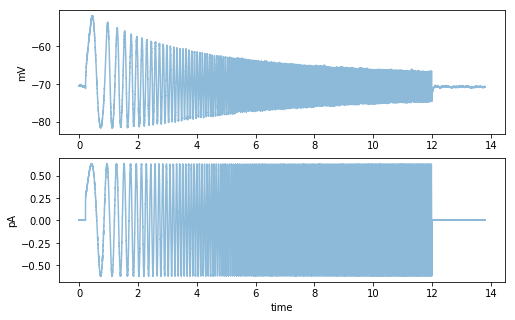

In [98]:
ix = 60
zap_file_path = abf_sheet_small_with_intrinsic_meta.at[ix, 'abf_path']
intrinsic_file_name = abf_sheet_small_with_intrinsic_meta.at[ix, 'cell_id']
print(zap_file_path)
sweep_set = zap_path_to_sweep_set(zap_file_path, intrinsic_file_name, meta_info_df = cell_final_raw_meta_df)

plot_sweep_from_sweep_set(sweep_set)

In [ ]:
#abf_sheet_small_with_intrinsic_meta = abf_sheet_small_with_intrinsic_meta[abf_sheet_small_with_intrinsic_meta['layer_name'] == 'L3c']

In [ ]:
abf_sheet_small_with_intrinsic_meta

In [ ]:
import pyabf
#15420003.abf is resonant
zap_abf_fn = abf_sheet_small.at[280, 'abf_path']
zap_sweep_set = zap_path_to_sweep_set(zap_abf_fn)
#zap_abf = pyabf.ABF(zap_abf_fn)
max_res_freq = get_max_resonant_frequency(zap_sweep_set)

0
/Users/stripathy/Downloads/Analayzed/Sub threshold hold -80 mV-L23-Lihua/7/15127120.abf
0
sweepY


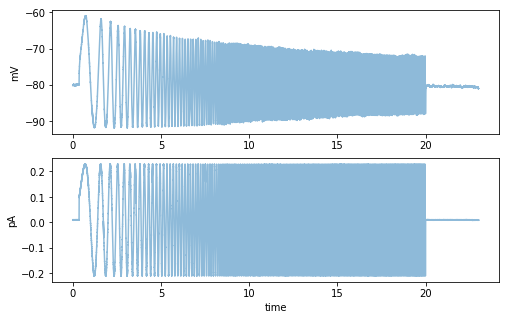

10000
0.3593
10
10
0.5
1000
1
/Users/stripathy/Downloads/Analayzed/Sub threshold hold -80 mV-L23-Lihua/6/15127075.abf
0
sweepY


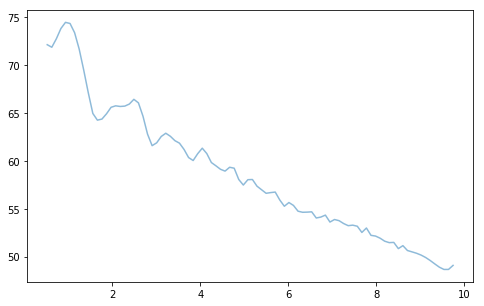

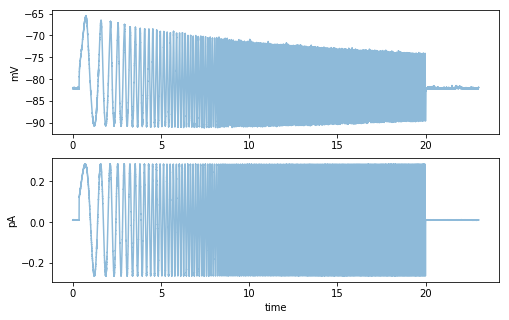

10000
0.3593
10
10
0.5
1000
2
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L23-Lihua/20/15127064.abf
0
sweepY


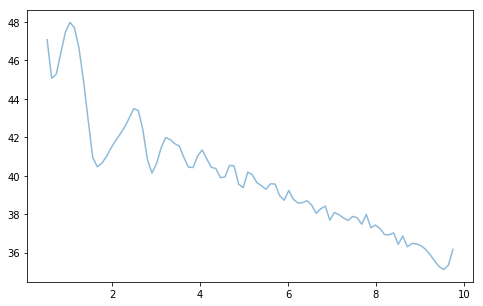

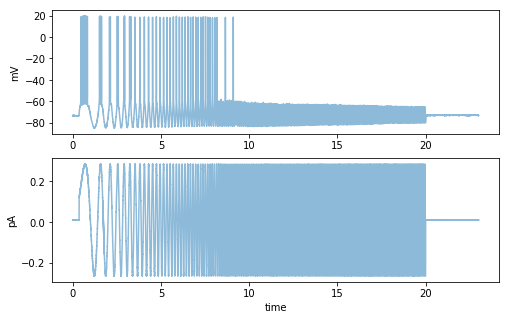

10000
0.3593
10
10
0.5
1000
3
/Users/stripathy/Downloads/Analayzed/Sub threshold hold -80 mV-L23-Lihua/1/14304312.abf
0
sweepY


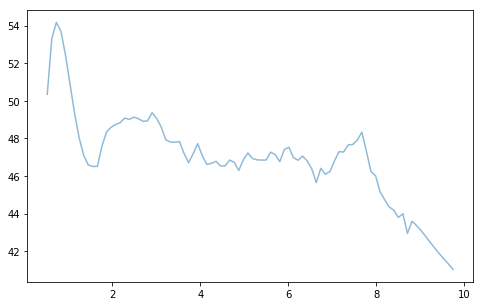

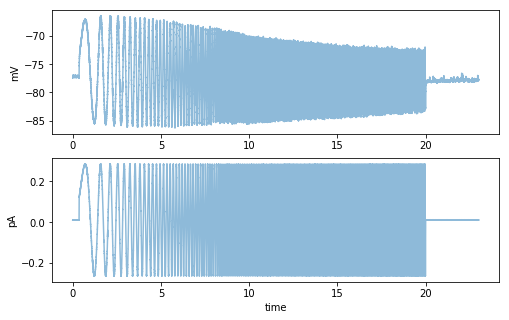

10000
0.3593
10
10
0.5
1000
4
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L23-Lihua/4/14304301.abf
0
sweepY


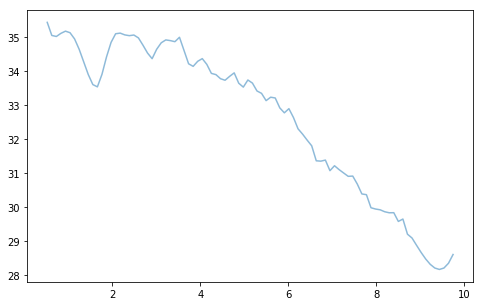

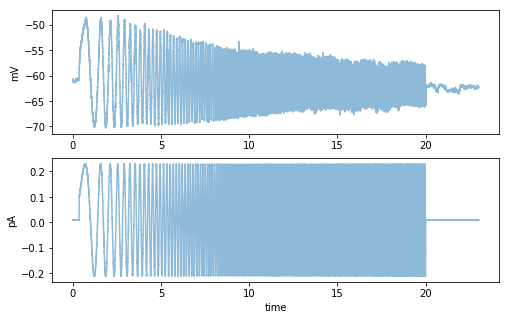

10000
0.3593
10
10
0.5
1000
5
/Users/stripathy/Downloads/Analayzed/Sub threshold hold -80 mV-L23-Lihua/8/15312067.abf
0
sweepY


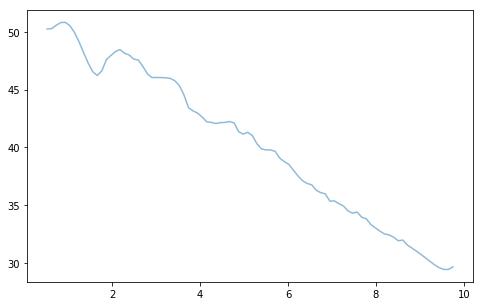

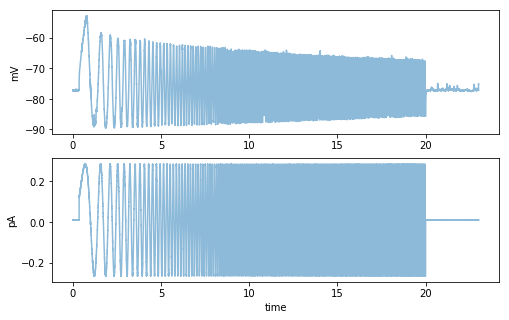

10000
0.3593
10
10
0.5
1000
6
/Users/stripathy/Downloads/Analayzed/Sub threshold hold -80 mV-L23-Lihua/3/14317349.abf
0
sweepY


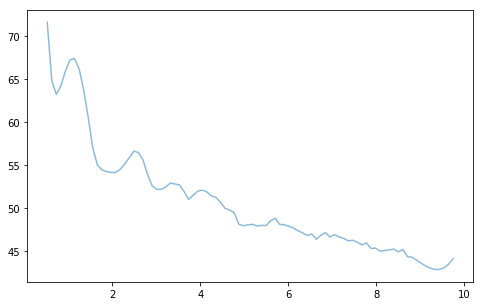

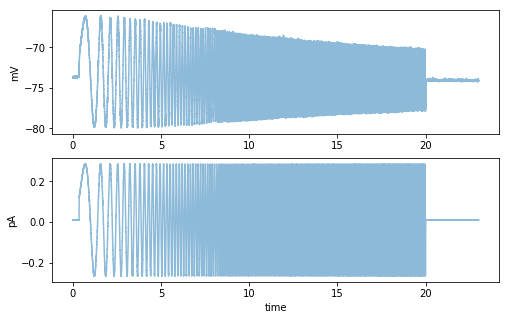

10000
0.3593
10
10
0.5
1000
7
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L23-Lihua/7/14318310.abf
0
sweepY


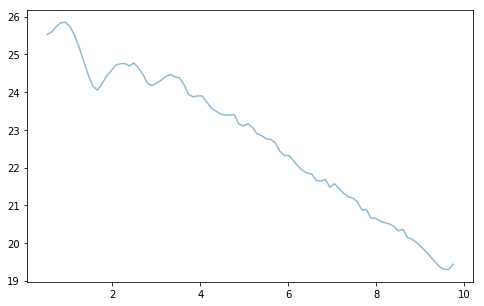

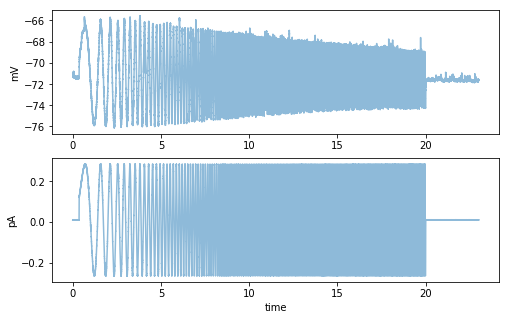

10000
0.3593
10
10
0.5
1000
8
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L5-Lihua/18/15407002.abf
0
sweepY


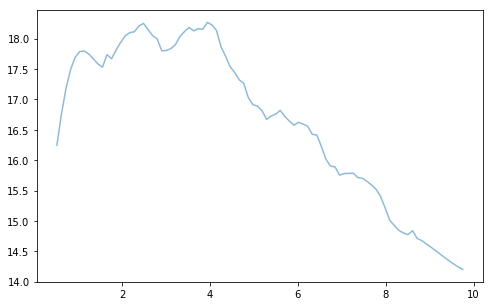

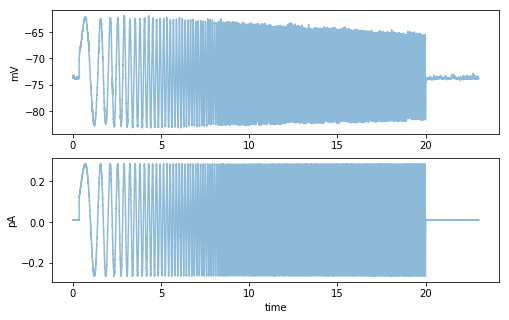

10000
0.3593
10
10
0.5
1000
9
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L5-Lihua/11/14911304.abf
0
sweepY


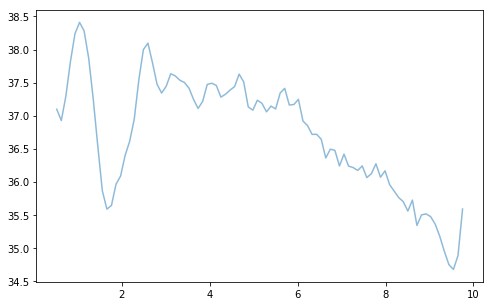

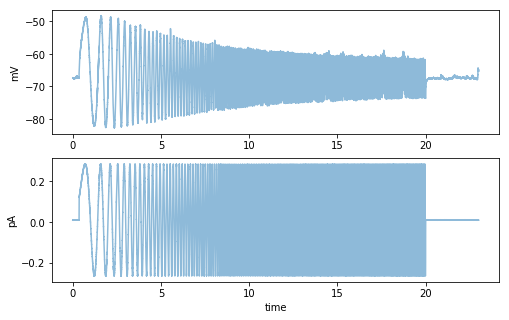

10000
0.3593
10
10
0.5
1000
10
/Users/stripathy/Downloads/Analayzed/Sub threshold hold -80 mV-L5-Lihua/3/14911316.abf
0
sweepY


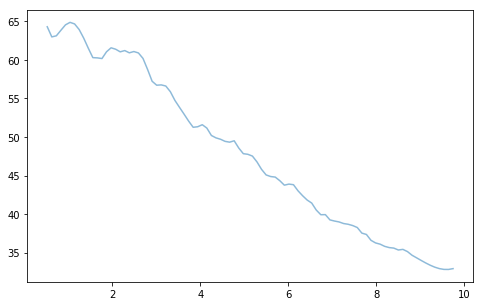

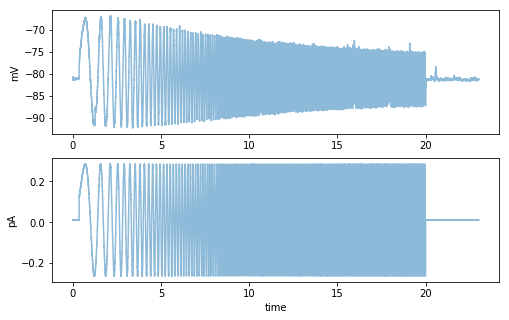

10000
0.3593
10
10
0.5
1000
11
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L5-Lihua/16/14n04363.abf
0
sweepY


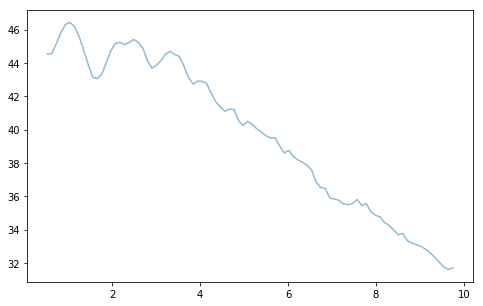

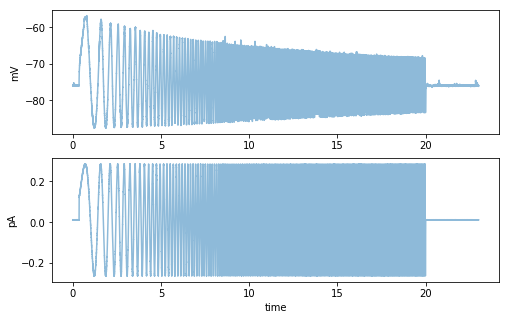

10000
0.3593
10
10
0.5
1000
12
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L5-Lihua/17/15224013.abf
0
sweepY


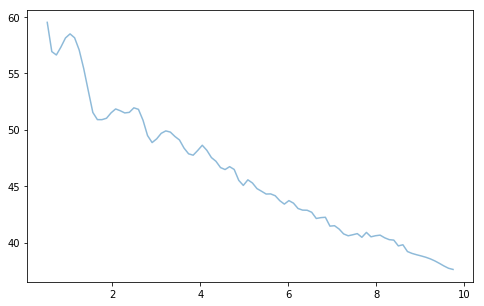

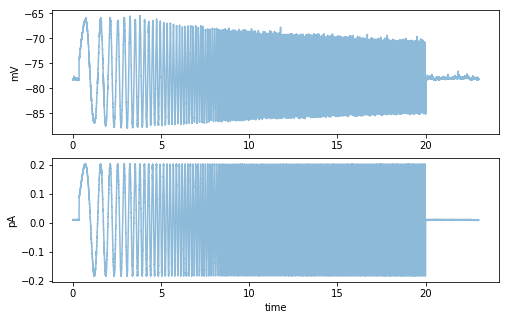

10000
0.3593
10
10
0.5
1000
13
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L5-Lihua/10/14715335.abf
0
sweepY


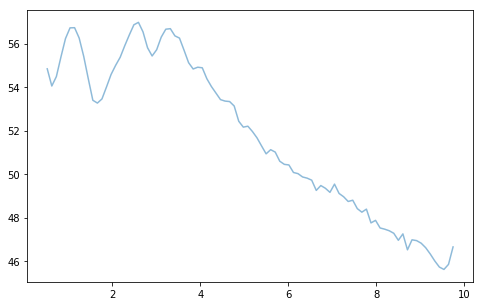

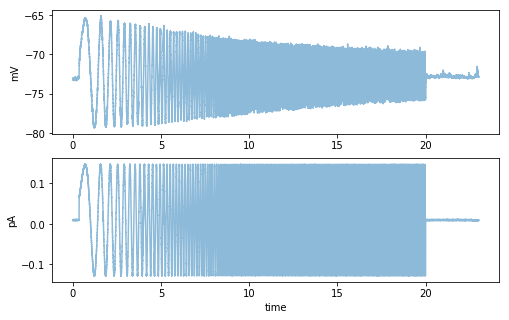

10000
0.3593
10
10
0.5
1000
14
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L5-Lihua/19/15420003.abf
0
sweepY


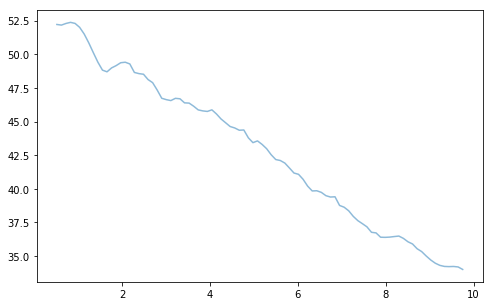

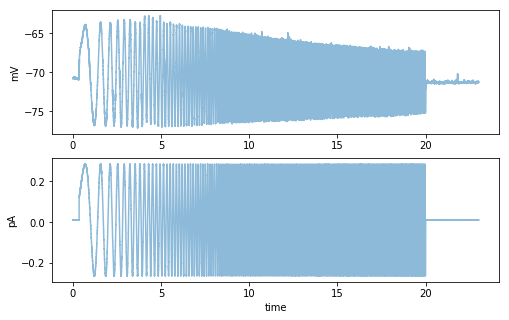

10000
0.3593
10
10
0.5
1000
15
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L5-Lihua/21/14626301.abf
0
sweepY


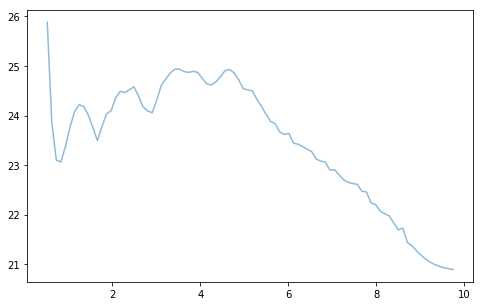

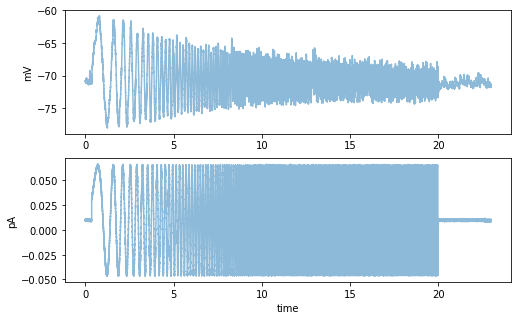

10000
0.3593
10
10
0.5
1000
16
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L5-Lihua/13/14918347.abf
0
sweepY


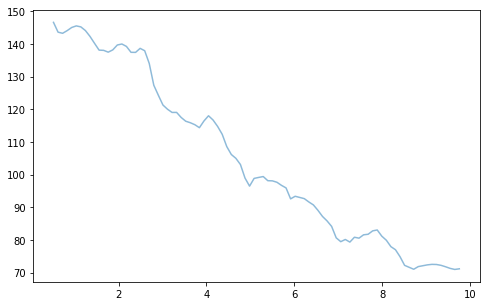

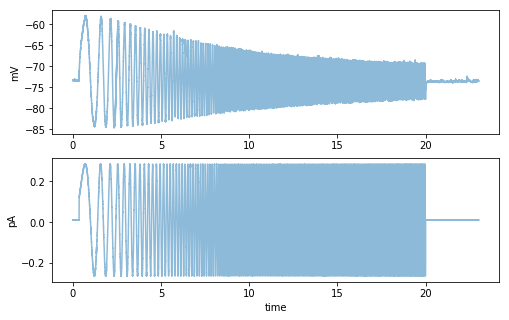

10000
0.3593
10
10
0.5
1000
17
/Users/stripathy/Downloads/Analayzed/Sub threshold hold -80 mV-L5-Lihua/7/15330014.abf
0
sweepY


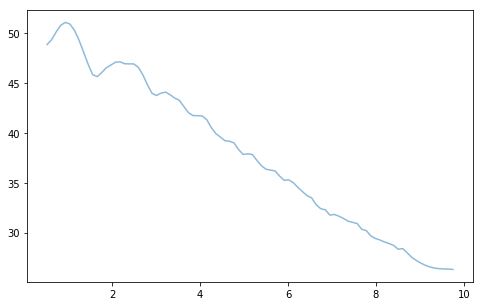

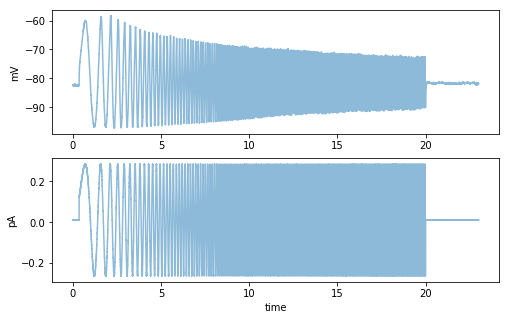

10000
0.3593
10
10
0.5
1000
18
/Users/stripathy/Downloads/Analayzed/Sub threshold hold -80 mV-L5-Lihua/1/14424346.abf
0
sweepY


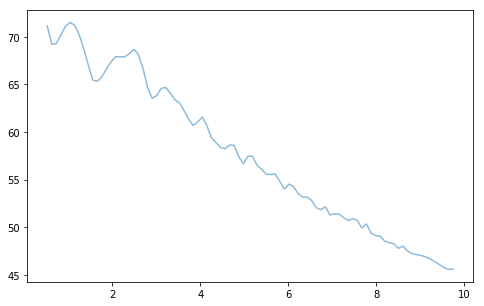

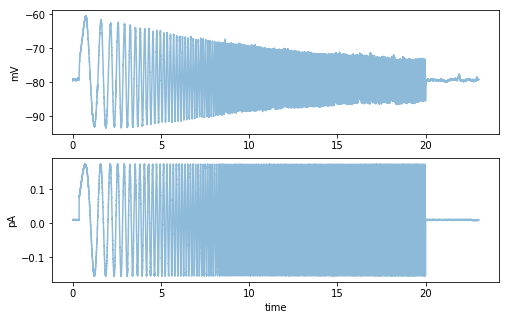

10000
0.3593
10
10
0.5
1000
19
/Users/stripathy/Downloads/Analayzed/Sub threshold hold -80 mV-L5-Lihua/2/14617302.abf
0
sweepY


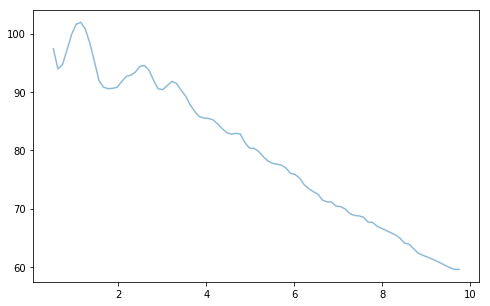

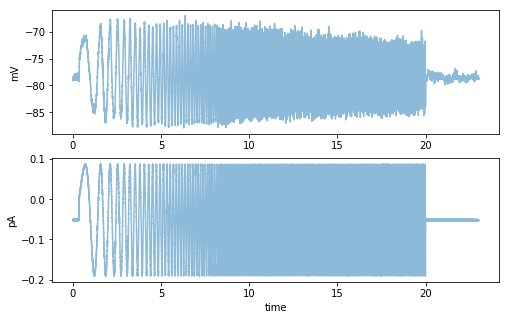

25000
0.3593
10
10
0.5
1000
20
/Users/stripathy/Downloads/Analayzed/Sub threshold hold -80 mV-L5-Lihua/5/14n10462.abf
0
sweepY


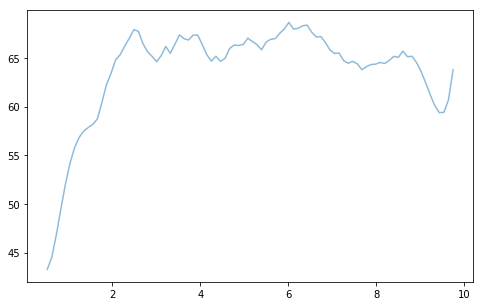

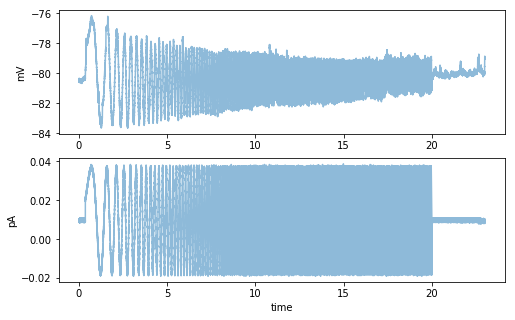

10000
0.2
10
10
0.5
1000
21
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L23-Lihua/18/15105072.abf
0
sweepY


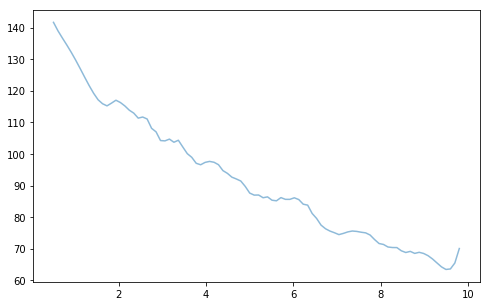

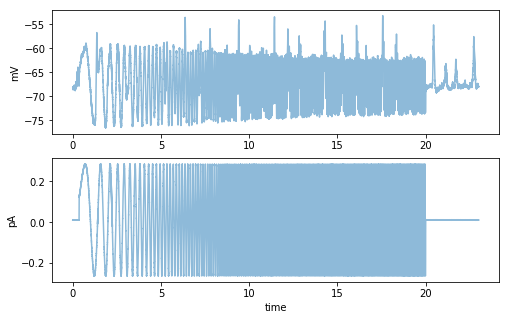

10000
0.3593
10
10
0.5
1000
22
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L23-Lihua/18/15105068.abf
0
sweepY


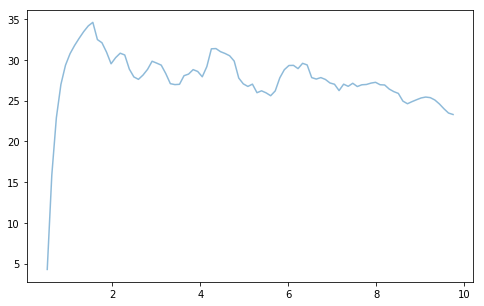

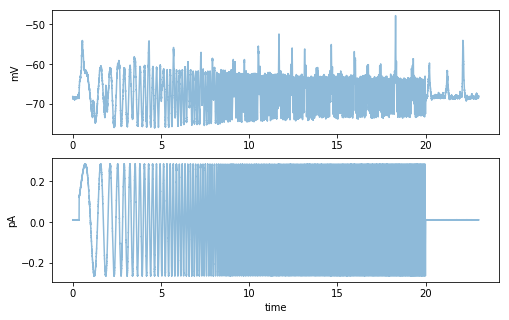

10000
0.3593
10
10
0.5
1000
23
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L23-Lihua/9/14d02125.abf
0
sweepY


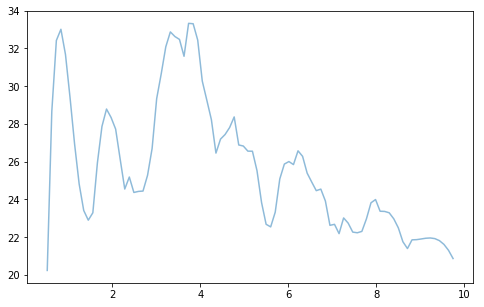

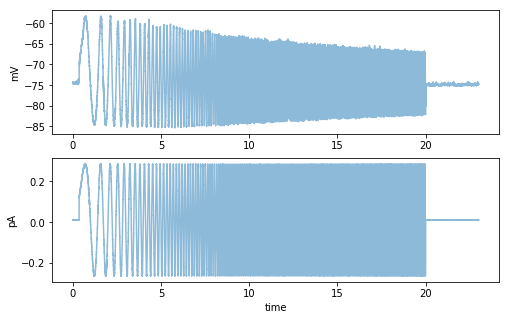

10000
0.3593
10
10
0.5
1000
24
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L23-Lihua/11/14d16025.abf
0
sweepY


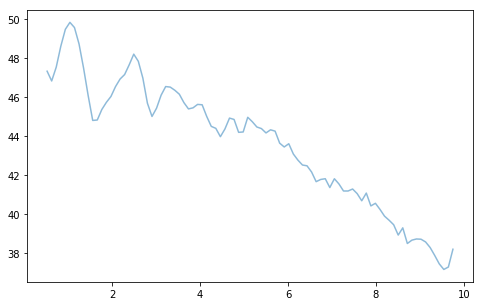

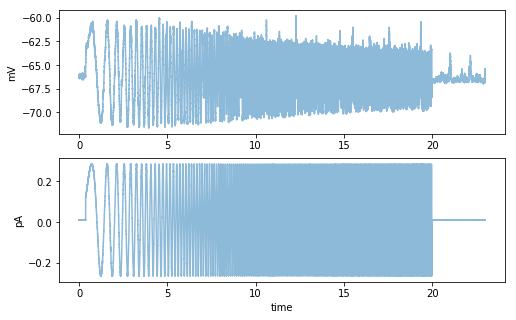

10000
0.3593
10
10
0.5
1000
25
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L23-Lihua/11/14d16019.abf
0
sweepY


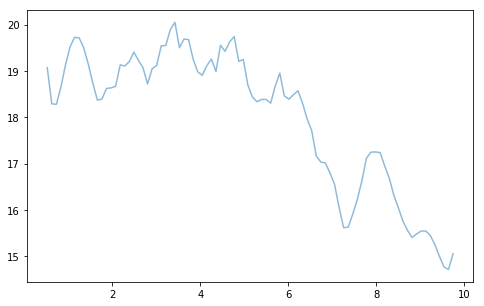

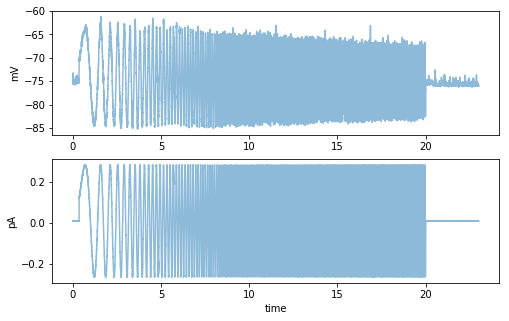

10000
0.3593
10
10
0.5
1000
26
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L23-Lihua/16/14d18117.abf
0
sweepY


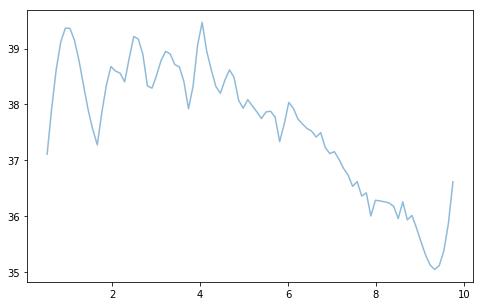

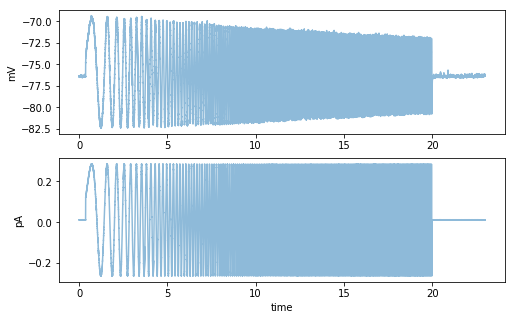

10000
0.3593
10
10
0.5
1000
27
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L23-Lihua/6/14317321.abf
0
sweepY


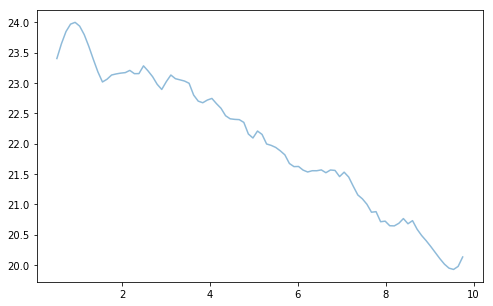

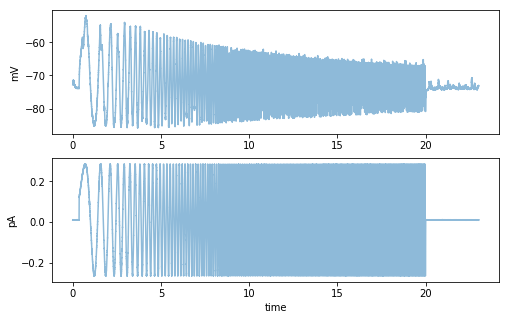

10000
0.3593
10
10
0.5
1000
28
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L23-Lihua/17/15105004.abf
0
sweepY


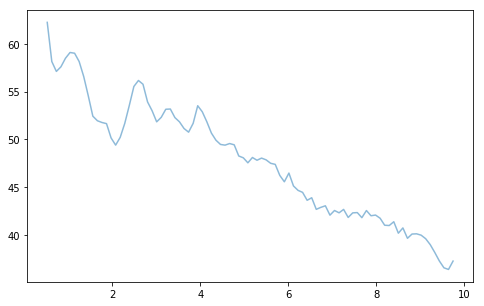

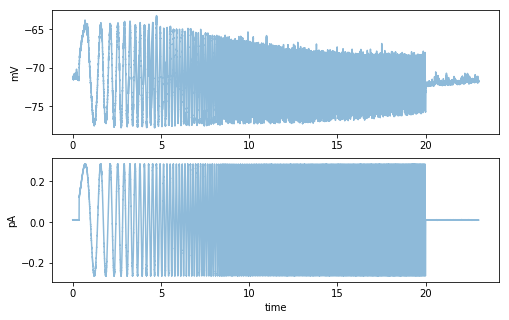

10000
0.3593
10
10
0.5
1000
29
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L23-Lihua/19/15127043.abf
0
sweepY


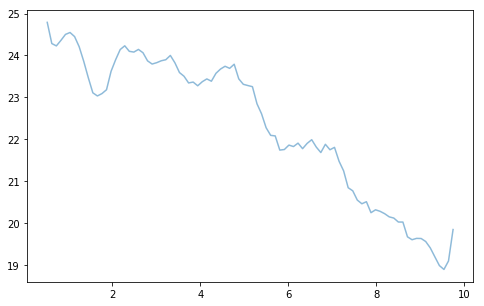

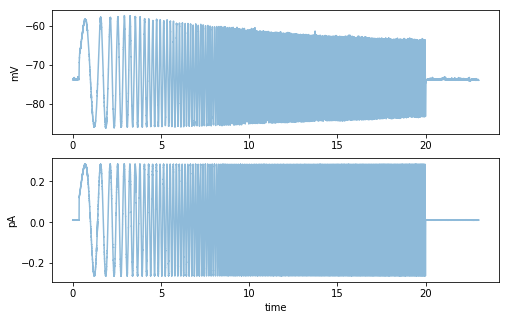

10000
0.3593
10
10
0.5
1000
30
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L23-Lihua/8/14d02057.abf
0
sweepY


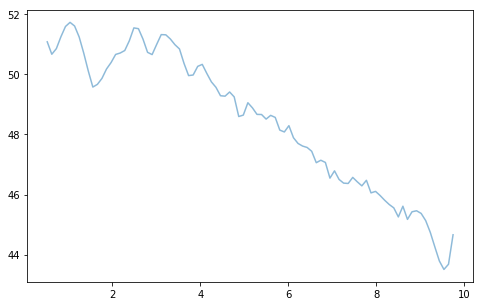

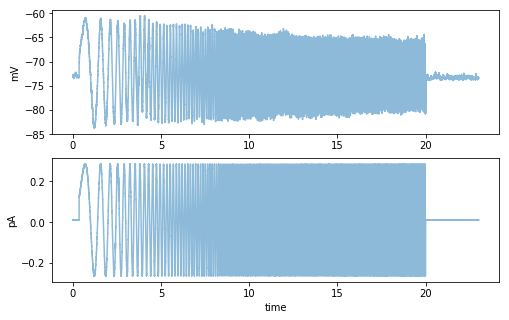

10000
0.3593
10
10
0.5
1000
31
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L23-Lihua/15/14d18091.abf
0
sweepY


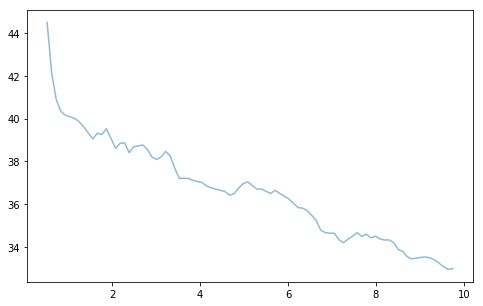

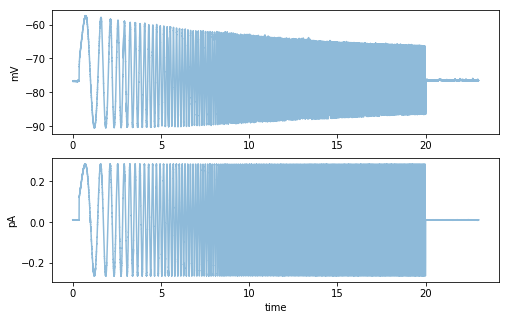

10000
0.3593
10
10
0.5
1000
32
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L23-Lihua/13/14d16138.abf
0
sweepY


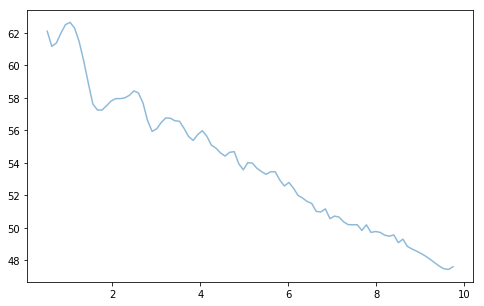

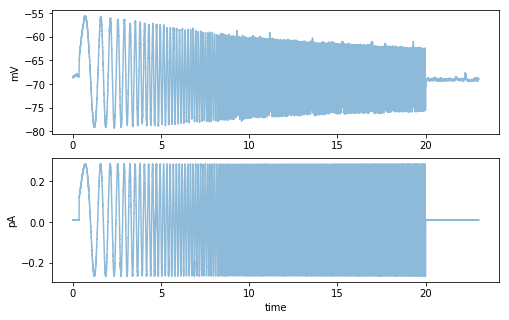

10000
0.3593
10
10
0.5
1000
33
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L23-Lihua/5/14317302.abf
0
sweepY


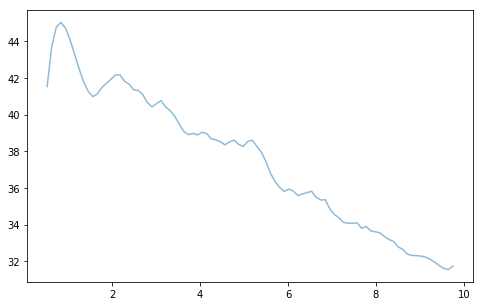

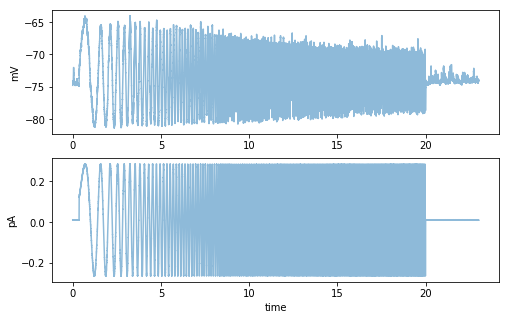

10000
0.3593
10
10
0.5
1000
34
/Users/stripathy/Downloads/Analayzed/Sub threshold hold RMP-L23-Lihua/14/14d18008.abf
0
sweepY


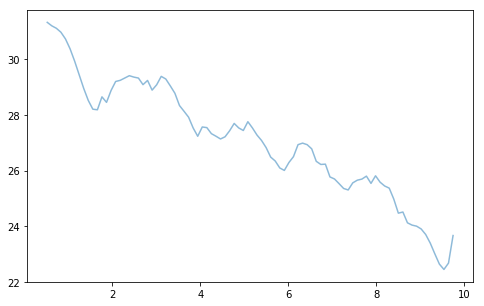

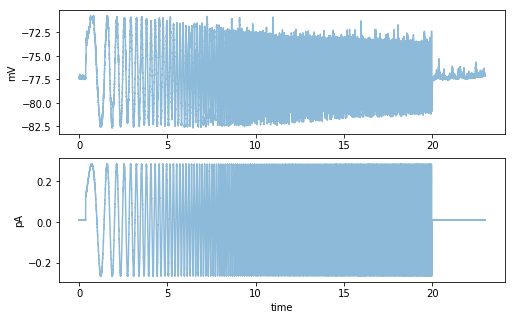

10000
0.3593
10
10
0.5
1000
35
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 3. ZAP function.Raw data/Sub threshold  hold RMP/2019_11_28_0093/2019_11_28_0095.abf
1
sweepY


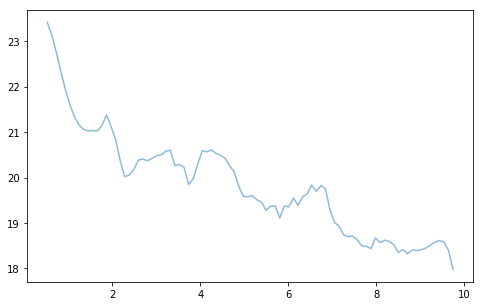

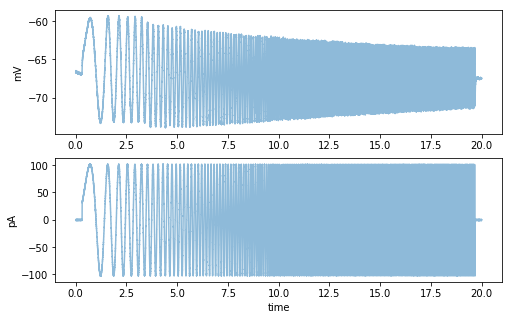

20000
0.2
10
10
0.5
1000
36
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 3. ZAP function.Raw data/Sub threshold  hold RMP/2020_01_06_0016/2020_01_06_0007.abf
1
sweepY


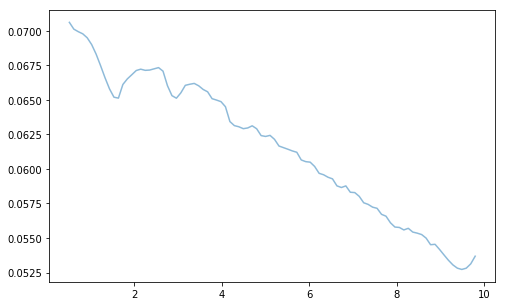

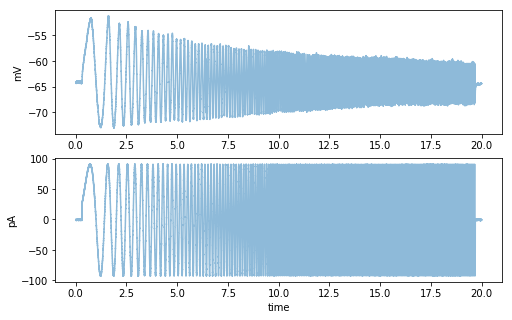

20000
0.2
10
10
0.5
1000
37
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 3. ZAP function.Raw data/Sub threshold  hold RMP/2020_01_06_0016/2020_01_06_0012.abf
1
sweepY


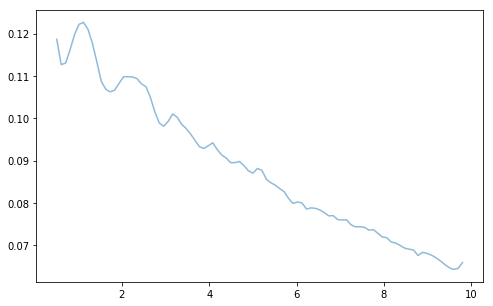

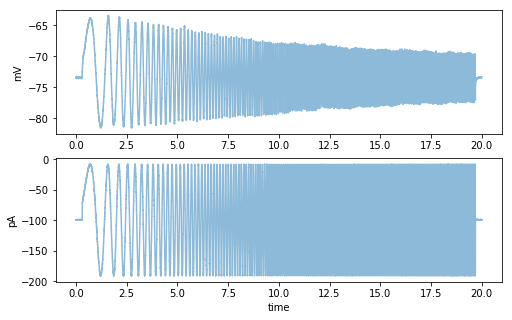

20000
0.2
10
10
0.5
1000
38
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 3. ZAP function.Raw data/Sub threshold  hold RMP/2020_01_27_0042/2020_01_27_0043.abf
1
sweepY


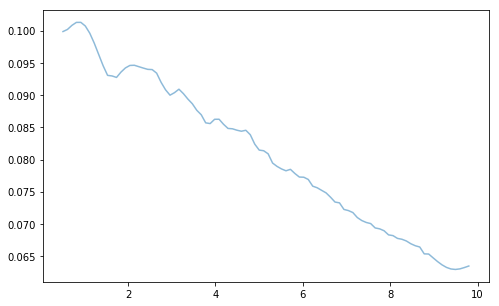

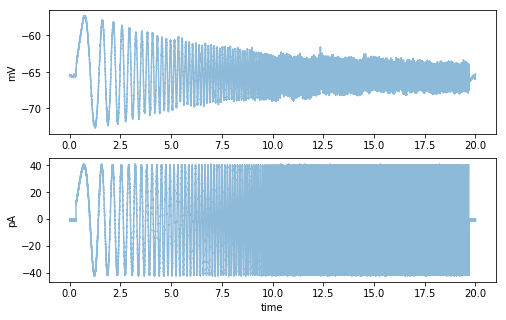

20000
0.2
10
10
0.5
1000
39
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 3. ZAP function.Raw data/Sub threshold  hold RMP/2020_01_27_0038/2020_01_27_0037.abf
1
sweepY


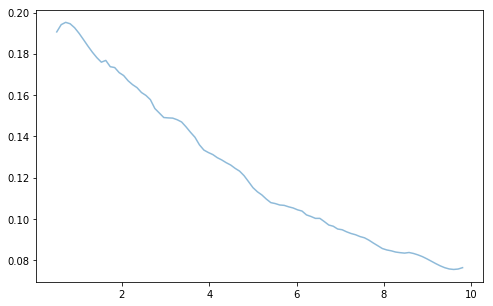

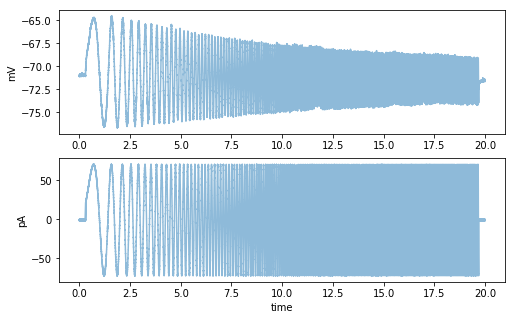

20000
0.2
10
10
0.5
1000
40
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 3. ZAP function.Raw data/Sub threshold  hold-80 mV/2020_01_27_0038/2020_01_27_0035.abf
1
sweepY


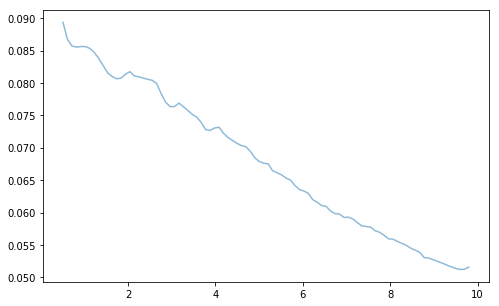

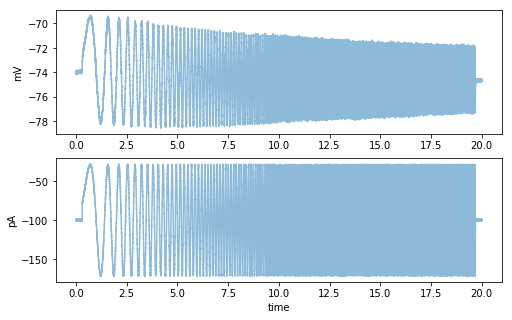

20000
0.2
10
10
0.5
1000
41
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 3. ZAP function.Raw data/Sub threshold  hold RMP/2020_01_06_0090/2020_01_06_0087.abf
1
sweepY


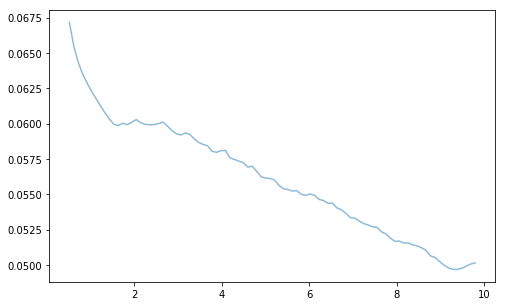

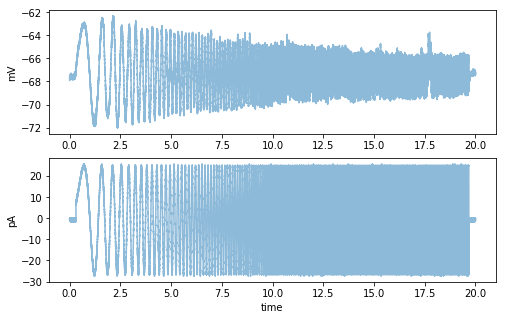

20000
0.2
10
10
0.5
1000
42
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 3. ZAP function.Raw data/Sub threshold  hold-80 mV/2020_01_06_0090/2020_01_06_0089.abf
1
sweepY


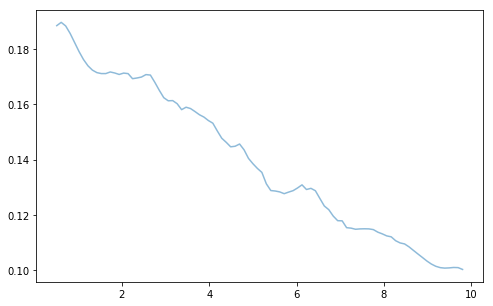

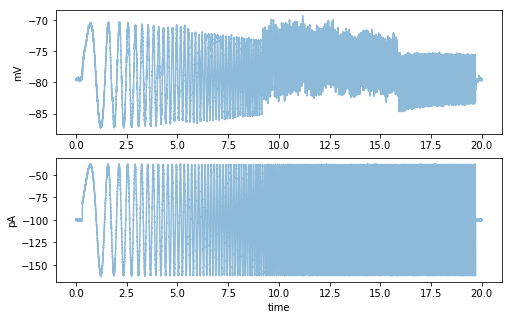

20000
0.2
10
10
0.5
1000
43
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 3. ZAP function.Raw data/Sub threshold  hold RMP/2020_01_06_0063/2020_01_06_0062.abf
1
sweepY


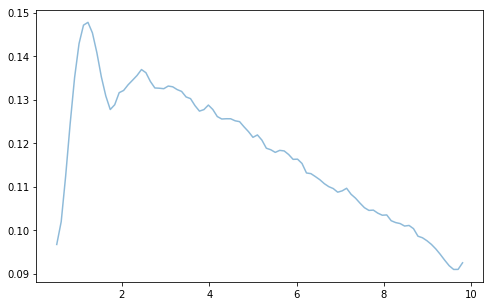

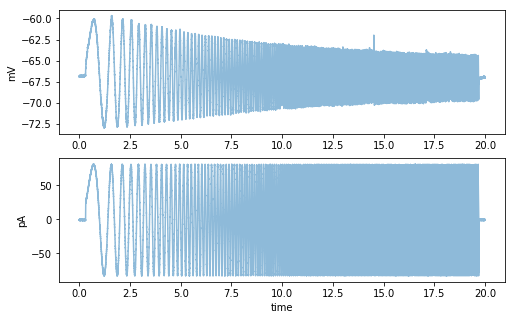

20000
0.2
10
10
0.5
1000
44
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 3. ZAP function.Raw data/Sub threshold  hold RMP/2020_01_06_0048/2020_01_06_0039.abf
1
sweepY


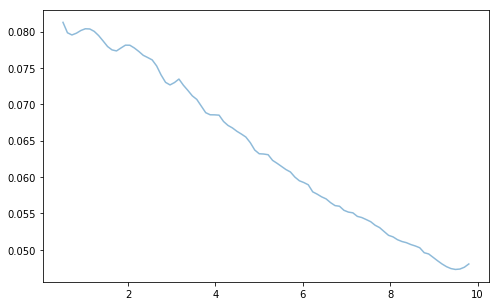

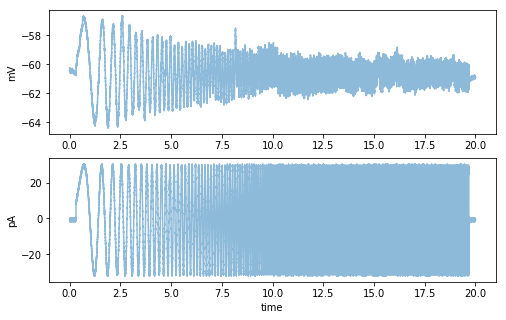

20000
0.2
10
10
0.5
1000
45
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 3. ZAP function.Raw data/Sub threshold  hold-80 mV/2020_01_06_0048/2020_01_06_0043.abf
1
sweepY


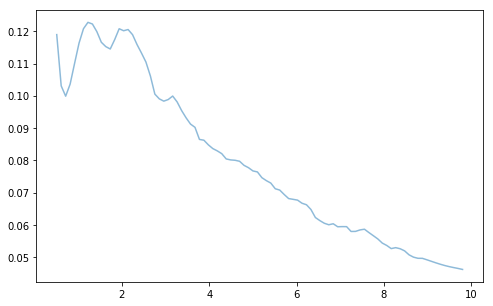

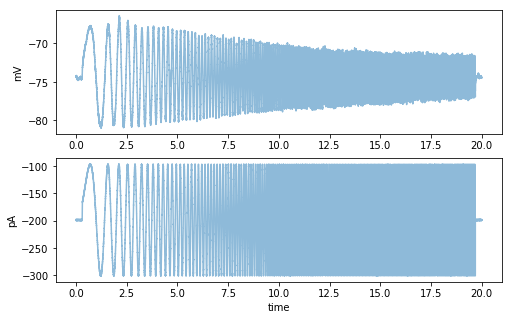

20000
0.2
10
10
0.5
1000
46
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 3. ZAP function.Raw data/Sub threshold  hold RMP/2020_01_06_0082/2020_01_06_0079.abf
1
sweepY


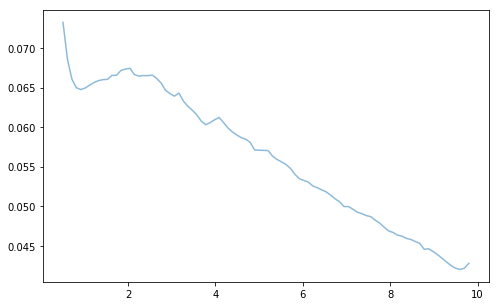

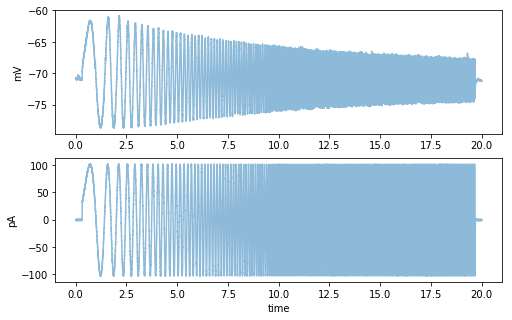

20000
0.2
10
10
0.5
1000
47
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold, hold -80 mV, before ZD7288/2016_02_25_0255/2016_02_25_0234.abf
1
sweepY


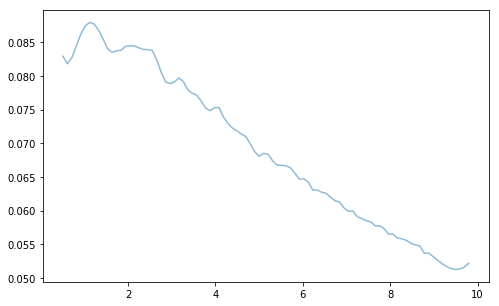

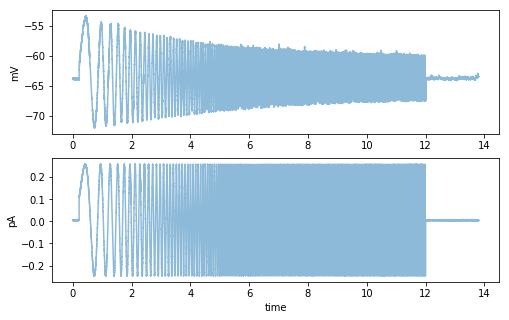

16666
sampling rate is 16666, not calculating impedance
48
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold hold RMP/2016_02_25_0255/2016_02_25_0212.abf
1
sweepY


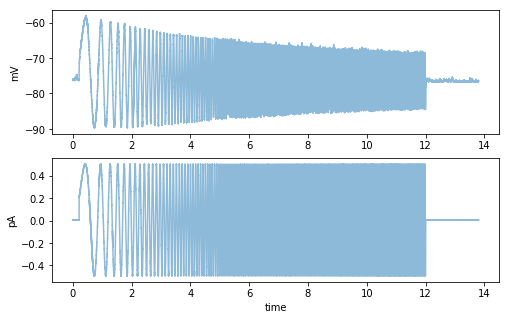

16666
sampling rate is 16666, not calculating impedance
49
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold hold RMP/2016_03_01_0000/2016_03_01_0006.abf
1
sweepY


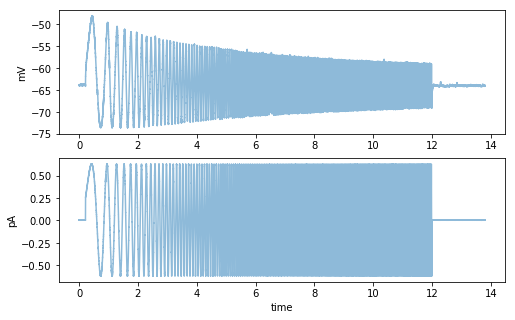

16666
sampling rate is 16666, not calculating impedance
50
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold  hold-80 mV/2016_03_01_0000/2016_03_01_0026.abf
1
sweepY


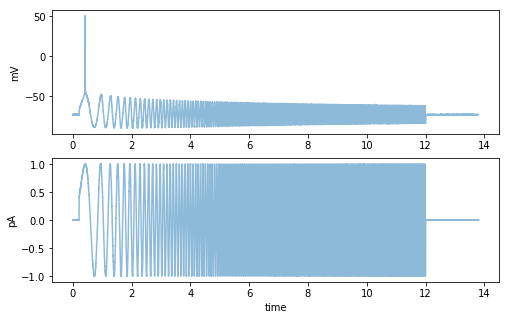

16666
sampling rate is 16666, not calculating impedance
51
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold hold RMP/2016_02_25_0073/2016_02_25_0077.abf
1
sweepY


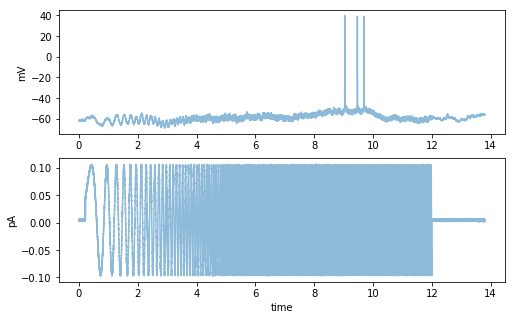

16666
sampling rate is 16666, not calculating impedance
52
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold hold RMP/2016_03_03_0002/2016_03_03_0028.abf
1
sweepY


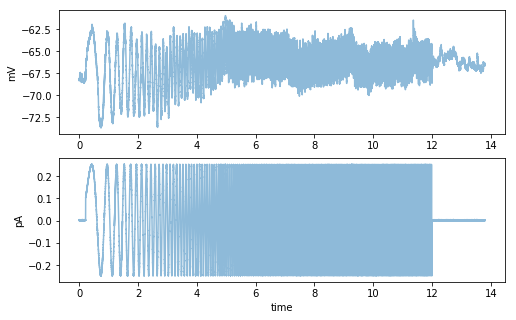

16666
sampling rate is 16666, not calculating impedance
53
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold hold RMP/2016_03_01_0047/2016_03_01_0054.abf
1
sweepY


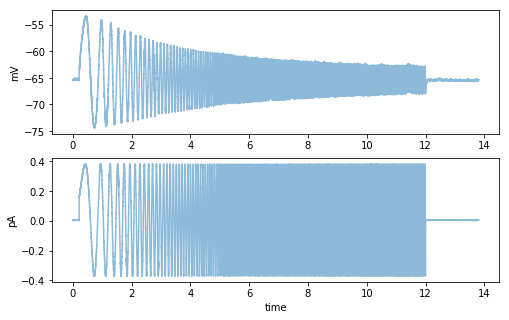

16666
sampling rate is 16666, not calculating impedance
54
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold hold RMP/2016_03_01_0047/2016_03_01_0054.abf
1
sweepY


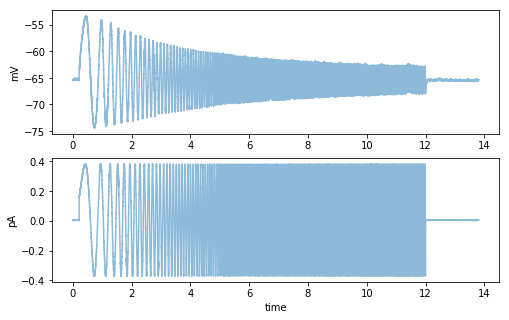

16666
sampling rate is 16666, not calculating impedance
55
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold hold RMP/2016_03_01_0047/2016_03_01_0054.abf
1
sweepY


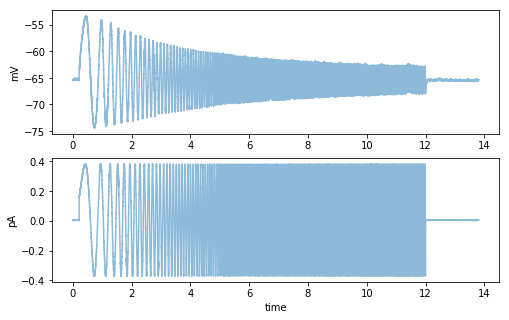

16666
sampling rate is 16666, not calculating impedance
56
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold hold RMP/2016_03_01_0047/2016_03_01_0054.abf
1
sweepY


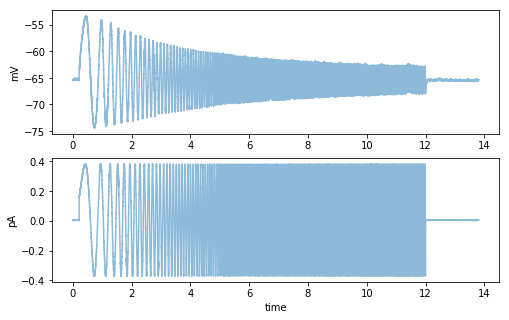

16666
sampling rate is 16666, not calculating impedance
57
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold  hold-80 mV/2016_03_01_0047/2016_03_01_0076.abf
1
sweepY


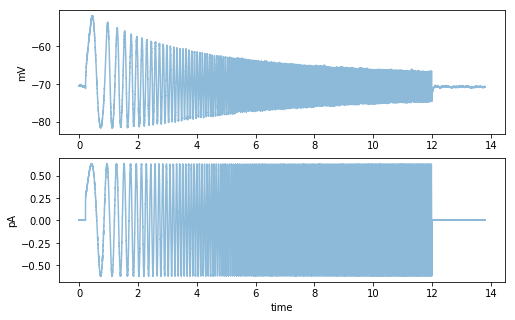

16666
sampling rate is 16666, not calculating impedance
58
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold  hold-80 mV/2016_03_01_0047/2016_03_01_0076.abf
1
sweepY


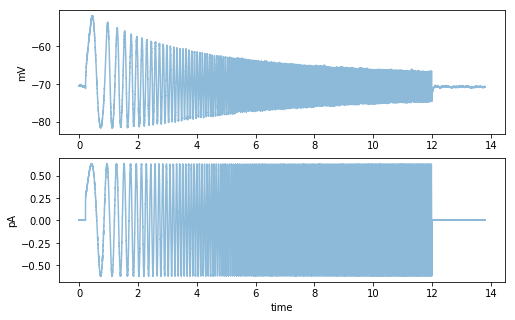

16666
sampling rate is 16666, not calculating impedance
59
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold  hold-80 mV/2016_03_01_0047/2016_03_01_0076.abf
1
sweepY


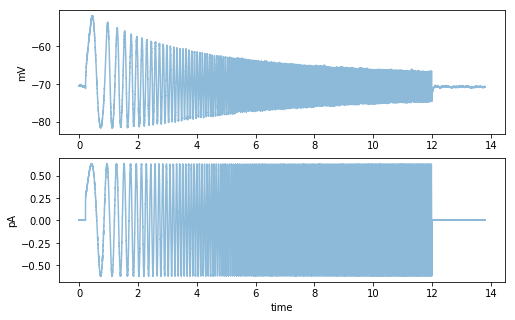

16666
sampling rate is 16666, not calculating impedance
60
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold  hold-80 mV/2016_03_01_0047/2016_03_01_0076.abf
1
sweepY


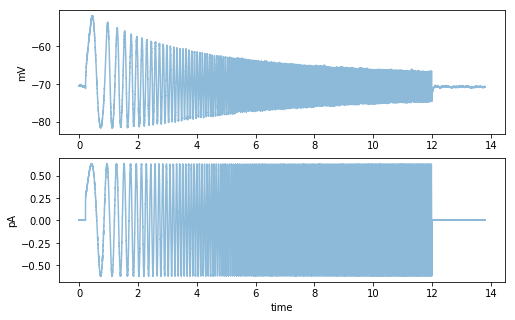

16666
sampling rate is 16666, not calculating impedance
61
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold hold RMP/2016_03_03_0103/2016_03_03_0107.abf
1
sweepY


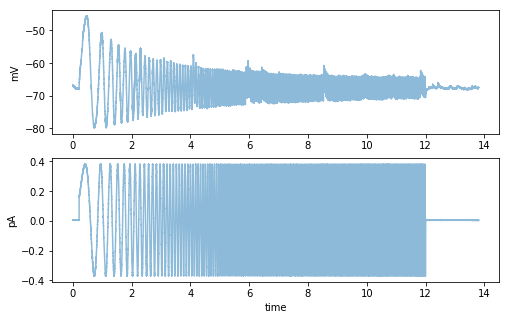

16666
sampling rate is 16666, not calculating impedance
62
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold  hold-80 mV/2016_03_03_0103/2016_03_03_0131.abf
1
sweepY


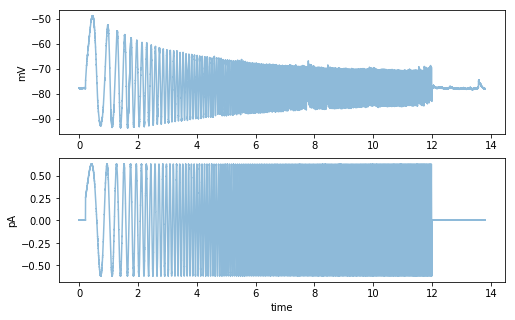

16666
sampling rate is 16666, not calculating impedance
63
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold hold RMP/19129057/19129059.abf
3
sweepY


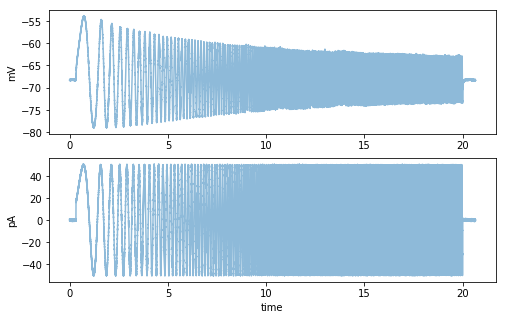

16666
sampling rate is 16666, not calculating impedance
64
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold hold RMP/2016_02_25_0082/2016_02_25_0083.abf
1
sweepY


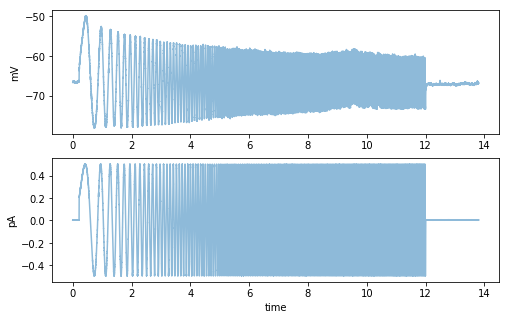

16666
sampling rate is 16666, not calculating impedance
65
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold hold RMP/2016_02_25_0134/2016_02_25_0136.abf
1
sweepY


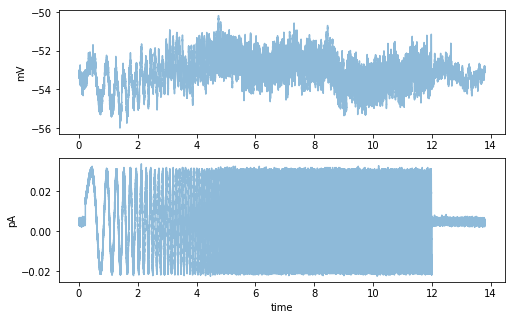

16666
sampling rate is 16666, not calculating impedance
66
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold  hold-80 mV/2016_02_25_0134/2016_02_25_0153.abf
1
sweepY


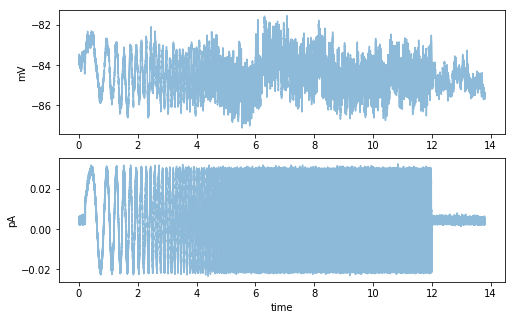

16666
sampling rate is 16666, not calculating impedance
67
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold hold RMP/19122003/19122004.abf
3
sweepY


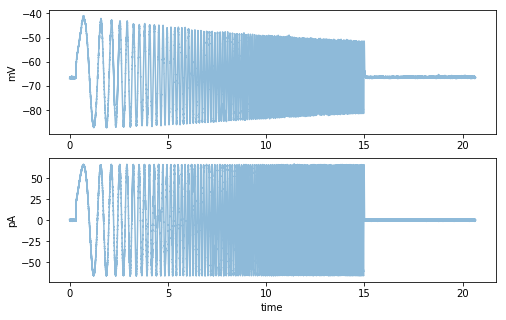

16666
sampling rate is 16666, not calculating impedance
68
/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 2 and 3. ZAP function.Raw data/Subthreshold/Sub threshold, hold RMP, before ZD7288/2016_02_25_0007/2016_02_25_0008.abf
1
sweepY


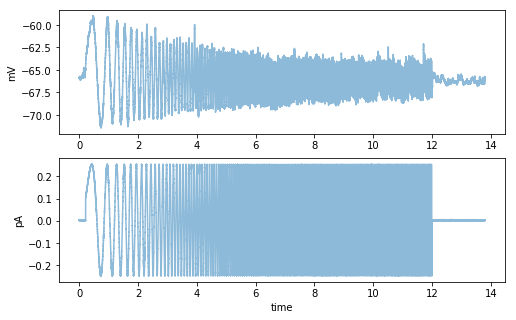

10000
0.2156486259450378
10
10
0.5
1000


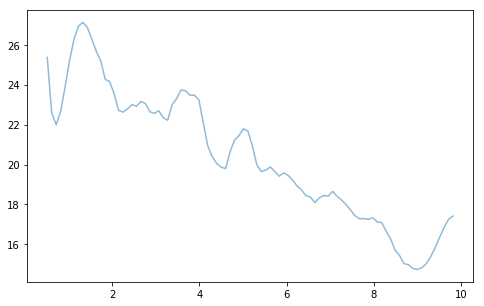

In [135]:
for index, row in abf_sheet_small_with_intrinsic_meta.iterrows():
    
    ix = index
    print(ix)
    zap_file_path = abf_sheet_small_with_intrinsic_meta.at[ix, 'abf_path']
    print(zap_file_path)

    intrinsic_file_name = abf_sheet_small_with_intrinsic_meta.at[ix, 'cell_id']
    if intrinsic_file_name != 'nan.abf' or intrinsic_file_name != '0.abf':
        zap_sweep_set = zap_path_to_sweep_set(zap_file_path, intrinsic_file_name, meta_info_df = cell_final_raw_meta_df)
        
        if zap_sweep_set is None:
            continue
        #zap_path = row['abf_path']
        #print(zap_path)
        #zap_sweep_set = zap_path_to_sweep_set(zap_path)
        #zap_abf = pyabf.ABF(zap_abf_fn)
        #try:
        plot_sweep_from_sweep_set(zap_sweep_set)
        max_res_freq = get_max_resonant_frequency(zap_sweep_set)

        #if max_res_freq > 1:
        #plot_sweep_from_sweep_set(zap_sweep_set)
        abf_sheet_small_with_intrinsic_meta.loc[index, 'zap_max_freq'] = max_res_freq
        #except Exception:
            #print('Frequency finding failed for some unknown reason')

In [22]:
import pyabf

ix = 60

zap_file_path = abf_sheet_small_with_intrinsic_meta.at[ix, 'abf_path']
zap_abf = pyabf.ABF(zap_file_path)

setch

#zap_abf.

In [30]:
zap_abf.setSweep(0, channel=0)
zap_abf.sweepY

array([-3.2724, -3.2718, -3.2742, ..., -3.2877, -3.2877, -3.2852],
      dtype=float32)

/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 3. ZAP function.Raw data/Sub threshold  hold-80 mV/2020_01_27_0038/2020_01_27_0035.abf
1
sweepY


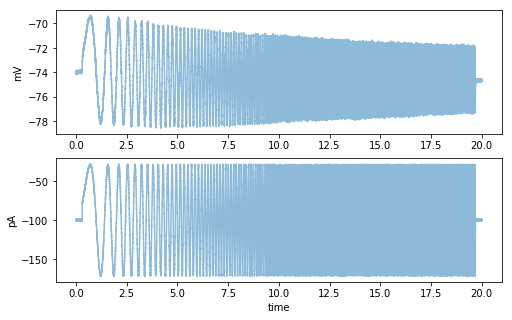

20000
0.2
10
10
0.5
1000


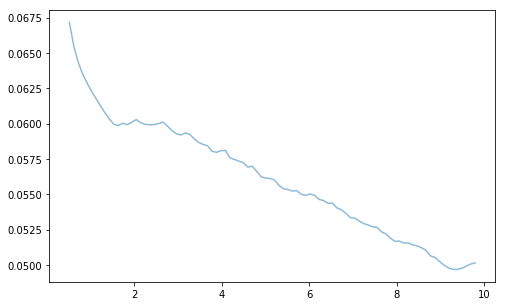

In [134]:
ix = 40

zap_file_path = abf_sheet_small_with_intrinsic_meta.at[ix, 'abf_path']
print(zap_file_path)

intrinsic_file_name = abf_sheet_small_with_intrinsic_meta.at[ix, 'cell_id']

zap_sweep_set = zap_path_to_sweep_set(zap_file_path, intrinsic_file_name, meta_info_df = cell_final_raw_meta_df)

plot_sweep_from_sweep_set(zap_sweep_set)

max_res_freq = get_max_resonant_frequency(zap_sweep_set)

In [133]:
from ipfx import chirp
from scipy.signal import savgol_filter
import numpy as np

def get_max_resonant_frequency(zap_sweep_set):
    
    sampling_rate = zap_sweep_set.sweeps[0].sampling_rate
    print(sampling_rate)
    
    if sampling_rate == 16666:
        print('sampling rate is 16666, not calculating impedance')
        return(np.nan)
    
    max_probe_freq = 10
    down_rate = 1000
    min_freq = .5
    
    i = zap_sweep_set.sweeps[0].i
    t = zap_sweep_set.sweeps[0].t
    diff_i = np.diff(i)
    new_t = t[1:]
    
    stim_discontinuities = new_t[np.abs(diff_i) > .02]
    if len(stim_discontinuities) == 1:
        start_time = stim_discontinuities[0]
        end_time = 19.9
    elif len(stim_discontinuities) == 2:
        start_time = stim_discontinuities[0]
        end_time = stim_discontinuities[1]
    else:
        start_time = .2
        end_time = 19.9

    if end_time > t[-1]:
        end_time = 12
        max_probe_freq = 10
        

    stim_duration = end_time - start_time
    
#     if stim_duration < 15:
#          max_probe_freq = 12
    
    if sampling_rate == 16666:
        down_rate = 16666 / 5
        
#     start_time = 0
#     end_time = t[-1] - .1
    
    end_time = 10
        
    print(start_time)
    print(end_time)
    print(max_probe_freq)
    print(min_freq)
    print(down_rate)
        
    (resistance, reactance, freq) = chirp.chirp_amp_phase(zap_sweep_set, 
                                                          start = start_time, 
                                                          end = end_time, 
                                                          max_freq=max_probe_freq, 
                                                          min_freq = min_freq, down_rate = down_rate)
    n_filt = int(np.rint(1/(freq[1]-freq[0])))*2 + 1
    filt = lambda x: savgol_filter(x, n_filt, 5)
    amp, phase = map(filt, [resistance, reactance])

    #amp = resistance
    
    
    
    
    fig = plt.figure(figsize=(8, 5))
    plt.plot(freq[0:-1], amp[0:-1], alpha = .5)

    i_max = np.argmax(amp[0:-1])
    z_max = freq[i_max]
#     if z_max < 1.02:
#         z_max = 1
    return(z_max)
    print(z_max)

In [101]:
abf_temp_final_res_sheet = abf_sheet_small[abf_sheet_small['zap_max_freq'] > 0]
abf_temp_final_res_sheet.to_csv('output_files/abf_temp_final_res_sheet.csv')

In [ ]:
plot_sweep_from_sweep_set(zap_sweep_set)

In [32]:
from matplotlib import pyplot as plt
from ipfx.sweep import Sweep, SweepSet
from ipfx import epochs

def zap_path_to_sweep_set(zap_file_path, intrinsic_abf_file_name, meta_info_df):
    
    curr_file = zap_file_path

    meta_dict = meta_info_df

    #curr_file = '15o08020.abf'

    meta_row = meta_dict.loc[meta_dict['cell_id'] == intrinsic_abf_file_name]
    if len(meta_row) == 0:
        print(intrinsic_abf_file_name + 'not in metadata sheet')
        return None

    file_path = meta_row['full_path'].values[0]
    stim_file_path = meta_row['stim_path'].values[0]


    zap_abf = pyabf.ABF(zap_file_path)

    stim_channel_num = int(meta_row['stim_chan'].values[0])
    response_chan_num = int(meta_row['resp_chan'].values[0])
    stim_gain = meta_row['stim_gain'].values[0]
    response_gain = meta_row['resp_gain'].values[0]

    start_time = meta_row['stim_start_time'].values[0]
    end_time = meta_row['stim_end_time'].values[0]
    resp_sampling_rate = meta_row['resp_sampling_rate'].values[0]
    stim_sampling_rate = meta_row['stim_sampling_rate'].values[0]
    resp_offset = meta_row['resp_offset'].values[0]
    stim_name = meta_row['stim_name'].values[0]
    
    
    stim_name = 'sweepY'
    print(stim_channel_num)
    print(stim_name)
    
    
    recorder_name = meta_row['recorder_name'].values[0]
    
    #stim_dict = get_stim_info(stim_abf, stim_channel_num, stim_gain, stim_name)
    #stim_amps = stim_dict['stim_amp_vec']
    
    sweep_plot_list = [0]
    #fig = plt.figure(figsize=(8, 5))

    clamp_mode = "CurrentClamp"
    
    if recorder_name == 'Lihua':
        stim_name = 'sweepY'
        stim_channel_num = 1

    sweep_list = list()

    i = 0
#     for i in range(0, 1):
    sweep_num = i
    zap_abf.setSweep(sweep_num, channel=response_chan_num)

    time_vec = zap_abf.sweepX
    response_vec = zap_abf.sweepY*response_gain + resp_offset

    zap_abf.setSweep(sweep_num, channel=stim_channel_num)

    if stim_name == 'sweepY':
        stim_vec = zap_abf.sweepY * stim_gain
    else:
        stim_vec = zap_abf.sweepC * stim_gain

    sweep = Sweep(t=time_vec,
                  v=response_vec,
                  i=stim_vec,
                  sampling_rate=resp_sampling_rate,
                  sweep_number=i,
                  clamp_mode=clamp_mode,
                  #epochs = curr_epoch
                  )
    sweep_list.append(sweep)
    sweep_set = SweepSet(sweep_list)
    
    return(sweep_set)
    # decorate the plots
#     ax1.set_ylabel(abf.sweepLabelY)
#     ax2.set_xlabel(abf.sweepLabelX)
#     ax2.set_ylabel(abf.sweepLabelC)
#     #ax1.axes.set_xlim(0, .35)  # <-- adjust axis like this
#     plt.show()

In [ ]:
abf.sweepX[1] - abf.sweepX[0] 

In [36]:
import pyabf
def plot_sweep_from_sweep_set(sweep_set, plot_diff = False):
    fig = plt.figure(figsize=(8, 5))
    sweep = sweep_set.sweeps[0]
    ax1 = fig.add_subplot(211)

    if plot_diff:
        ax1.plot(sweep.t[1:], np.diff(sweep.v), alpha = .5)
    else:
        ax1.plot(sweep.t, sweep.v, alpha = .5)
    
    ax2 = fig.add_subplot(212)
    
    if plot_diff:
        ax2.plot(sweep.t[1:], np.diff(sweep.i), alpha = .5)
    else:
        ax2.plot(sweep.t, sweep.i, alpha = .5)
    
    ax1.set_ylabel('mV')
    ax2.set_xlabel('time')
    ax2.set_ylabel('pA')
    #ax1.axes.set_xlim(0, .4)  # <-- adjust axis like this
    #ax2.axes.set_xlim(0, .4)  # <-- adjust axis like this
    #ax1.axes.set_xlim(0, .35)  # <-- adjust axis like this
    plt.show()

In [ ]:
ss = list()
ss.append(sweep)
sweep_set = SweepSet(ss)

In [ ]:
(start_ind, end_ind) = epochs.get_stim_epoch(sweep.i)
print(start_ind)
sweep.i[0:10]
#sweep.i[end_ind+1]
1/(sweep.t[1] - sweep.t[0]) * .35
start_ind = 3591
end_ind = int(20 * 1/(sweep.t[1] - sweep.t[0]))
print(end_ind)

In [ ]:
np.argmin(np.diff(sweep.i))

In [ ]:
fig = plt.figure(figsize=(8, 5))
plt.plot(freq, resistance, alpha = .5)

In [ ]:
n_filt = int(np.rint(1/(freq[1]-freq[0])))*2 + 1
filt = lambda x: savgol_filter(x, n_filt, 3)
amp, phase = map(filt, [resistance, reactance])


In [ ]:
fig = plt.figure(figsize=(8, 5))
plt.plot(freq[2:-1], amp[2:-1], alpha = .5)

i_max = np.argmax(amp[2:-1])
z_max = freq[i_max]
print(z_max)

In [ ]:
v = zap_sweep_set.sweeps[0].v
i = zap_sweep_set.sweeps[0].i
t = zap_sweep_set.sweeps[0].t

In [ ]:
from ipfx import time_series_utils as tsu
from ipfx import epochs

In [ ]:
epochs.get_stim_epoch(i, test_pulse = False)

In [ ]:
di = np.diff(i)

new_t = t[1:]
new_t[np.abs(di) > .02]


In [138]:
zap_abf.abfDateTime

datetime.datetime(2016, 3, 1, 15, 45, 48, 921000)

In [136]:
path = '/Users/stripathy/Downloads/homeira_lihua_resonance_abf_files/Homeira/Layer 3. ZAP function.Raw data/Sub threshold  hold RMP'